<a href="https://colab.research.google.com/github/SumayyaShaji/datascience/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
#Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np # linear algebra
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
df = pd.read_csv("covid-19.csv", encoding='utf-8')
df.head()

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [46]:
df.shape

(1034, 3)

In [47]:
df = df.drop_duplicates('headlines')
df.shape


(941, 3)

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 1033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       940 non-null    object
 1   headlines    940 non-null    object
 2   description  940 non-null    object
dtypes: object(3)
memory usage: 29.4+ KB


In [49]:
df.describe()


,source,headlines,description
count,940,940,940
unique,164,940,918
top,Times of India,Where Australia's first international tourists...,Trending Topics Â· Top Stories Right Now Â· Fo...
freq,95,1,7


In [50]:
df.isnull().mean()


source         0.001063
headlines      0.001063
description    0.001063
dtype: float64

In [51]:
df.head

<bound method NDFrame.head of                 source  ...                                        description
0                  ABC  ...  Visitors from New Zealand, Singapore, South Ko...
1                  UPI  ...  "This year, it's been an absolute nightmare," ...
2      The Japan Times  ...  ... remains at 100 seconds to midnight this ye...
3                Devex  ...  And for earlier news, visit the timeline for 2...
4            Firstpost  ...  Explained: All you wanted to know ski jumping ...
...                ...  ...                                                ...
1029              Mint  ...  France began requiring the passes, which certi...
1030  The Conversation  ...  Italy was the first Western democratic country...
1031        S&P Global  ...  A smaller share of companies with a heavy debt...
1032           Reuters  ...  ROME, Dec 23 (Reuters) - Italy has tightened r...
1033   The Local Italy  ...  See the latest news and updates from The Local...

[941 rows x 3 columns

In [52]:
df.columns

Index(['source', 'headlines', 'description'], dtype='object')

In [53]:
df.dtypes


source         object
headlines      object
description    object
dtype: object

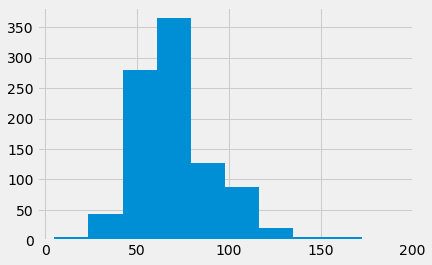

In [54]:
df['headlines'].str.len().hist()


In [55]:
df['source'].unique()

array(['ABC', 'UPI', 'The Japan Times', 'Devex', 'Firstpost', 'Valneva',
       'Traveller.com.au', 'Fortune', 'The Economic Times', 'UN News',
       'Times of India', 'The New York Times', 'BBC',
       'Carnegie Endowment for International Peace', 'The Hindu',
       'ThePrint', 'The Financial Express', 'Bloomberg.com',
       'Business Wire', 'DVIDS', 'TIME', 'Financial Times', 'Japan Today',
       'UCA News', 'Business Standard', 'USA Today', 'Hindustan Times',
       'Asahi Shimbun', 'Deccan Herald',
       'Regulatory Affairs Professionals Society', 'Nature', 'Reuters',
       'The White House', 'Healthline', 'The Boston Globe',
       'Down To Earth', 'CNN', 'WHO | World Health Organization',
       'Nikkei Asia', 'NBC News', 'CNBC', 'Pharmaceutical Technology',
       'OpIndia', 'The New Yorker', 'News18', 'Forbes India', 'India.com',
       'India Today', 'SDG Knowledge Hub', 'Mint', 'NPR', 'The Economist',
       'Human Rights Watch', 'Medical News Today', 'CBC',
       'Pe

In [56]:
df['source'].value_counts()

Times of India       95
Hindustan Times      51
The Hindu            51
Schengen Visa        42
Business Standard    39
                     ..
Global News           1
The Independent       1
The New Yorker        1
Politico              1
DTNext                1
Name: source, Length: 164, dtype: int64

In [57]:
df['source'].value_counts().nlargest(30)

Times of India                     95
Hindustan Times                    51
The Hindu                          51
Schengen Visa                      42
Business Standard                  39
The Economic Times                 36
News18                             30
Reuters                            30
The Indian Express                 28
NDTV.com                           27
The Local Italy                    25
The Guardian                       25
France 24                          24
The Financial Express              24
Mint                               17
BBC                                16
India Today                        16
Al Jazeera                         16
Firstpost                          14
USA Today                          12
India.com                          12
WHO | World Health Organization    11
Arab News                          10
Bloomberg.com                       9
WION                                8
CNBC                                8
Nature      

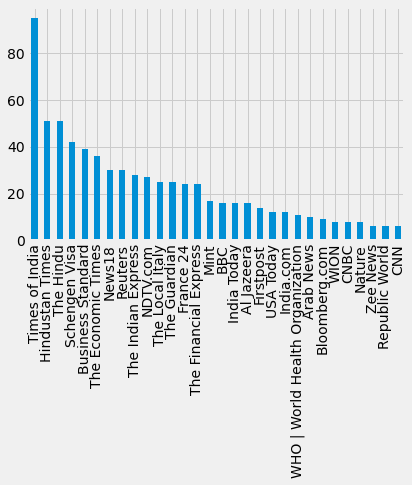

In [58]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

In [62]:
df['headlines']=df['headlines'].apply(str)


In [59]:
!pip install neattext
# Load Text Cleaning Package
import neattext.functions as nfx

In [64]:
# Cleaning Text
df['clean_tweet'] = df['headlines'].apply(nfx.remove_hashtags)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)
#Remove blank rows if any.
df['clean_tweet'] .dropna(inplace=True)
# Change all the text to lower case.
df['clean_tweet']  = [entry.lower() for entry in df['clean_tweet'] ]
df[['text','clean_tweet']]




KeyError: ignored

In [63]:
df['clean_text'] = df['headlines'].apply(nfx.remove_hashtags)
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_userhandles(x))
# Cleaning Text: Multiple WhiteSpaces
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
# Cleaning Text: Punctuations
df['clean_text'] = df['clean_text'].apply(nfx.remove_puncts)
#Remove blank rows if any.
df['clean_text'] .dropna(inplace=True)
# Change all the text to lower case.
df['clean_text']  = [entry.lower() for entry in df['clean_text'] ]
df[['headlines','clean_text']]


,headlines,clean_text
0,Where Australia's first international tourists...,where australias first international tourists ...
1,China hasn't reported COVID-19 death in year w...,china hasnt reported covid19 death in year wit...
2,"Glimmers of hope, but Doomsday Clock stuck at ...",glimmers of hope but doomsday clock stuck at 1...
3,COVID-19 in 2021 â€” a timeline of the coronav...,covid19 in 2021 â€” a timeline of the coronavi...
4,Explained: All you wanted to know ski jumping ...,explained: all you wanted to know ski jumping ...
...,...,...
1029,"France, Italy impose strict covid-19 vaccine m...",france italy impose strict covid19 vaccine man...
1030,Italy â€“ once overwhelmed by COVID-19 â€“ tur...,italy â€“ once overwhelmed by covid19 â€“ turn...
1031,Italy's deleveraging success could help limit ...,italys deleveraging success could help limit m...
1032,Italy bans New Year events as COVID infections...,italy bans new year events as covid infections...


In [ ]:
 import re
 import string
 data = data.lodata = re.sub(r'\S*@\S*\s*', '', data)
In [6]: data = data.translate(str.maketrans('', '', string.punctuation))
In [7]: lines = data.split('\n')
 lines

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctation]
    headlines=''.join(no_punct)
    return words_wo_punct
df['headlines'].apply(lambda x: remove_punctuation(x)).head()
df.head()


In [ ]:
import re

text = "headlines"

text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

print(text)

calculate sentiment polarity

In [ ]:
polarity=[]
subjectivity=[]
for i in df['headlines'].values:
  try:

    analysis =TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
  except:

    polarity.append(0)
    subjectivity.append(0)  

In [ ]:
df['polarity']=polarity
df['subjectivity']=subjectivity

#dislaying positive news

In [ ]:
df[df.polarity>0].head(20)

#displaying negative news

In [ ]:
df[df.polarity<0].head(10)

#displaying neutral news

In [ ]:
df[df.polarity==0].head(10)

In [ ]:
X=df.drop('headlines',axis=1)
y=df['headlines']

In [ ]:
X=df.drop('headlines',axis=1)


In [ ]:
y=df['headlines']


In [ ]:
X.head()

In [ ]:
y.head()


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(headlines):
    headlines = str(headlines)
    headlines = headlines.lower()
    headlines = cleanup_re.sub(' ', headlines).strip()
    #headlines = " ".join(nltk.word_tokenize(headlines))
    return headlines
    df.headlines



In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]
for i in range(len()):
    review=re.sub( re.sub(r'\S*@\S*\s*', '',review)

    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)